# Exercises I - Required

Our Telco scenario continues:

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Do your work in a notebook named explore.ipynb. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).

    1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.
    
    2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

    3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

    4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

    5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

   6. Explore your dataset with any other visualizations you think will be helpful.

   7.  In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle

**Acquire and Prepare Data**

In [2]:
# Use our function from wrangle to acquire and prepare our data.

df = wrangle.wrangle_telco()
df.head()

,customer_id,total_charges,monthly_charges,tenure
0,0002-ORFBO,593.30,65.60,9
1,0003-MKNFE,542.40,59.90,9
2,0013-MHZWF,571.45,69.40,9
3,0015-UOCOJ,340.35,48.20,7
4,0016-QLJIS,5957.90,90.45,65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      7032 non-null   object 
 1   total_charges    7032 non-null   float64
 2   monthly_charges  7032 non-null   float64
 3   tenure           7032 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 274.7+ KB


**1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.**

**Split Data**

Before we explore bi- and multi-variate relationships, we must split our data to avoid leakage of unseen data.

In [4]:
# split into train, validate and test sets; notice that we are keeping X and Y together so far.

train, validate, test = wrangle.split_continuous(df)

train -> (3937, 4)
validate -> (1688, 4)
test -> (1407, 4)


---

# Goal
Let's keep our goal from our telco_churn scenario in mind here.

- I'm a customer analyst for Telco hoping I can build a prediction model that will be able to use the monthly_charges and tenure to see who has spent the most money with the company over their lifetime. 
- Since my target variable is continuous, **monthly_charges / tenure**, this is a regression problem. It's important to remember that Multiple linear regression analysis makes several key assumptions:

- There must be a linear relationship between the outcome variable and the independent variables. Scatterplots can show whether there is a linear or curvilinear relationship.
- No Multicollinearity—Multiple regression assumes that the independent variables are not highly correlated with each other.
- Multivariate Normality–Multiple regression assumes that the residuals are normally distributed.

# Hypothesize
- My Null Hypothesis is that there is no correlation between the monthly_charges / tenure and lifetime charges.
- My Alternative Hypothesis is that monthly_charges / tenure correlated with lifetime charges.

# Visualize and Test
- To test my hypothesis, I'm going to create some visualizations and test statistics with my **monthly_chrages and tenure**.
- At the same time, I'll be checking that the key assumptions for multiple linear regression are met.

---

**sns.heatmap()**

Let's look at a heatmap of the correlation coefficients for a dataset. Here is an aritcle with lots of heatmap customization options.

- https://towardsdatascience.com/all-about-heatmaps-bb7d97f099d7

- First, I need to calculate the correlation coefficient for each pair of variables.
- Pandas .corr() method allows me to quickly create a correlation matrix by computing pairwise correlation of columns. By default, method=pearson.
- I can change the .corr() argument to method=spearman if my variables are not normally distributed. Want to know more about the difference between pearson's r and spearman's rank? This article is short, sweet, and to the point.

In [10]:
# Create the correlation matrix for all customers.

total_charges_corr = train.drop(columns=['total_charges']).corr()
total_charges_corr

,monthly_charges,tenure
monthly_charges,1.000000,0.248734
tenure,0.248734,1.000000


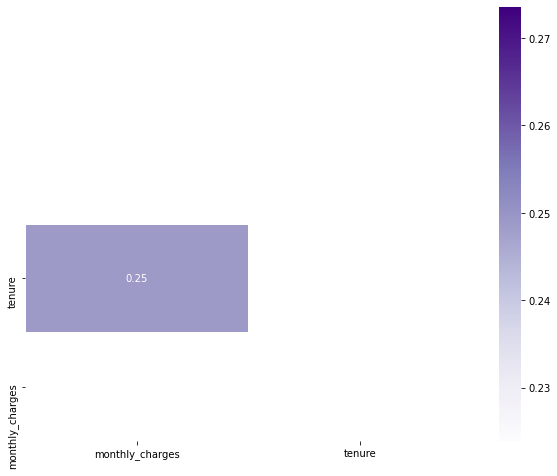

In [13]:
# Next, I pass my correlation matrix to Seaborn's heatmap along with any customization I want to perform.
plt.figure(figsize=(10,8))
sns.heatmap(total_charges_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(total_charges_corr))
plt.ylim(0, 4)

plt.show()

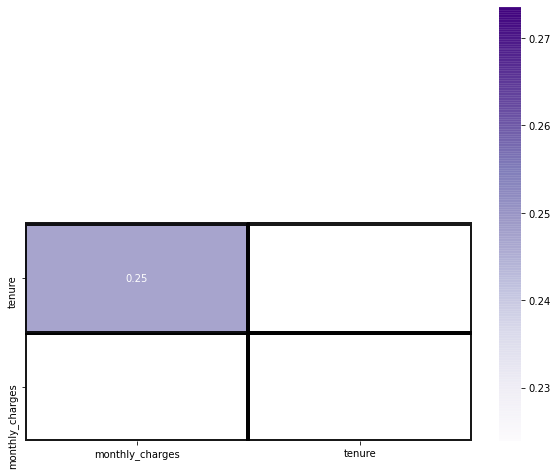

In [16]:
# Pass my correlation matrix to Seaborn's heatmap.

kwargs = {'alpha':.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'w', 
          'capstyle':'projecting',}

plt.figure(figsize=(10,8))
sns.heatmap(total_charges_corr, cmap='Purples', annot=True, mask= np.triu(total_charges_corr), **kwargs)
plt.ylim(0, 4)

plt.show()

**2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.**

In [25]:
def plot_variable_pairs(df):
    '''
    This function takes in the telco dataframe and returns 2 lmplots (scatterplots)
    The first plot shows the relationship between tenure and total_charges
    The second plot shows the relationship between monthly_charges and total_charges
    '''
    
    # lmplot of tenure with total_charges with tenure
    sns.lmplot(x='tenure', y='total_charges', data=df, line_kws={'color': 'thistle'}).set(title='tenure and total_charges')
    plt.show()
    
    #lmplot of tenure with total_charges with monthly_charges
    sns.lmplot(x='monthly_charges', y='total_charges', data=df, line_kws={'color': 'thistle'}).set(title='monthly_charges and total_charges')
    plt.show();

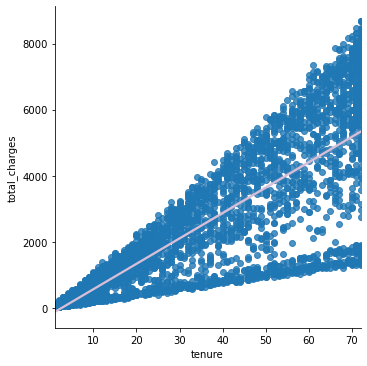

In [20]:
# lmplot of tenure with total_charges with tenure
sns.lmplot(x='tenure', y='total_charges', data=train, line_kws={'color': 'thistle'})
plt.show()

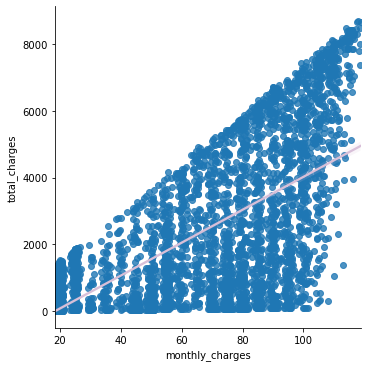

In [21]:
# lmplot of tenure with monthly_charges and tenure
sns.lmplot(x='monthly_charges', y='total_charges', data=train, line_kws={'color': 'thistle'})
plt.show()

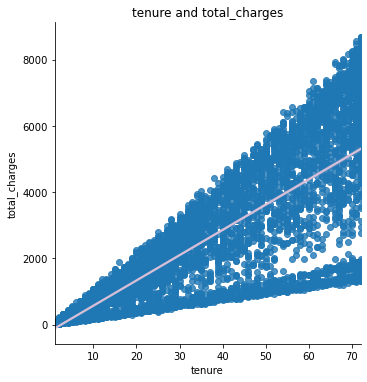

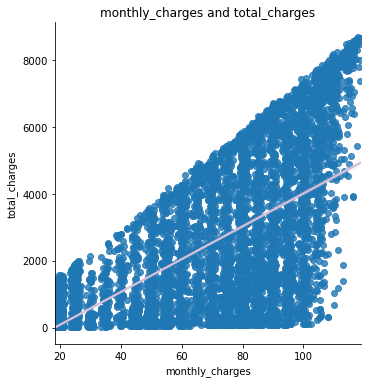

In [26]:
plot_variable_pairs(df)

**3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.**

In [32]:
def months_to_years(df):
    '''
    This function takes in the telco dataframe and
    Returns a dataframe with a new feature tenure_years, in complete years as a customer
    '''
    
    # function taking in the data frame
    df['tenure_years'] = round(df.tenure // 12)
    #df['tenure_years'] = df.tenure_years.astype('object')
    return df
    

In [33]:
df = months_to_years(df)
df.head()

,customer_id,total_charges,monthly_charges,tenure,tenure_years
0,0002-ORFBO,593.30,65.60,9,0
1,0003-MKNFE,542.40,59.90,9,0
2,0013-MHZWF,571.45,69.40,9,0
3,0015-UOCOJ,340.35,48.20,7,0
4,0016-QLJIS,5957.90,90.45,65,5


In [34]:
df.tenure_years.value_counts()

0    2058
5    1121
1    1047
2     876
4     820
3     748
6     362
Name: tenure_years, dtype: int64

In [35]:
# validate our data types

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      7032 non-null   object 
 1   total_charges    7032 non-null   float64
 2   monthly_charges  7032 non-null   float64
 3   tenure           7032 non-null   int64  
 4   tenure_years     7032 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 329.6+ KB


In [31]:
# Split into train, validate and test sets:
train, validate, test = wrangle.split_continuous(df)

train -> (3937, 5)
validate -> (1688, 5)
test -> (1407, 5)


In [36]:
telco_cols = ['monthly_charges', 'tenure', 'total_charges']

In [43]:
def plot_variable_pairs(train, cols, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None
    and displays a pairplot with a red regression line
    '''
    plot_kws={'line_kws':{'color':'orange'}, 'scatter_kws': {'alpha': 0.7}}
    sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'orange'}, 'scatter_kws': {'alpha': 0.1}})
    plt.show()

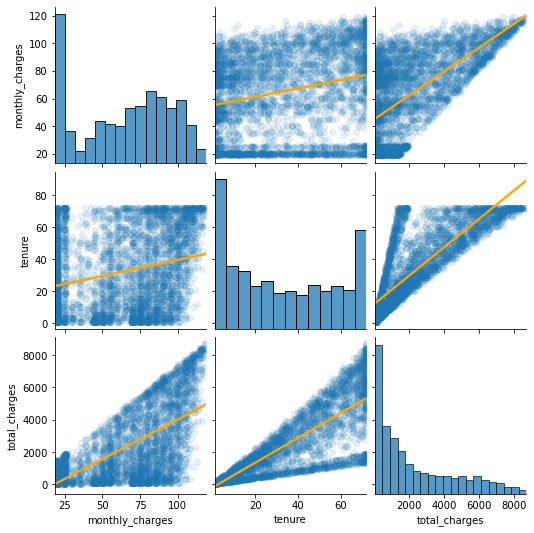

In [44]:
plot_variable_pairs(train, telco_cols)

In [45]:
def plot_pairplot(train, cols, hue=None):
    '''
    Take in train df, list of columns to plot, and hue=None
    and display scatter plots and hists.
    '''
    sns.pairplot(train[cols], corner=True)
    plt.show()

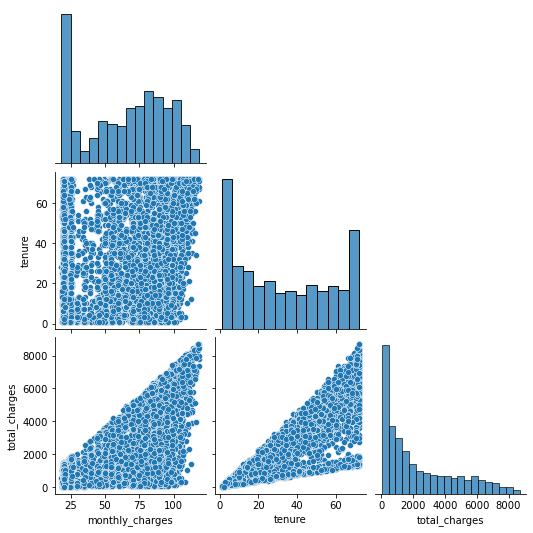

In [46]:
plot_pairplot(train, telco_cols)

**heatmap**

In [47]:
train[telco_cols].corr()

,monthly_charges,tenure,total_charges
monthly_charges,1.000000,0.248734,0.652264
tenure,0.248734,1.000000,0.827273
total_charges,0.652264,0.827273,1.000000


In [52]:
def create_heatmap(train, cols):
    corr_matrix = train[cols].corr()
    
    kwargs = {'alpha':.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'w', 
          'capstyle':'projecting',}

    plt.figure(figsize=(8,6))
    sns.heatmap(corr_matrix, cmap='Purples', annot=True, **kwargs)
    plt.ylim(0, 3)

    plt.show()

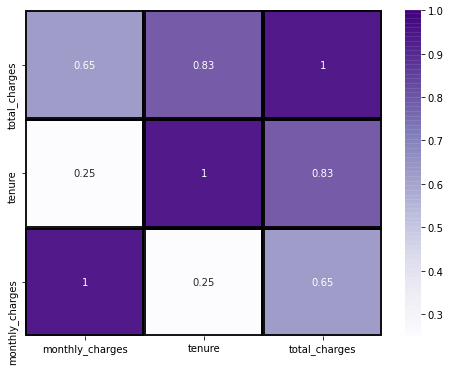

In [53]:
create_heatmap(train, telco_cols)

In [55]:
# Quick check of my Seaborn version installed.

sns.__version__

'0.11.0'

In [56]:
# Quick check of my pandas version installed.

pd.__version__

'1.1.3'

**Convert Data Types**

In [57]:
train['tenure_years'] = train.tenure_years.astype('object')
validate['tenure_years'] = validate.tenure_years.astype('object')
test['tenure_years'] = test.tenure_years.astype('object')

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5403 to 6336
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      3937 non-null   object 
 1   total_charges    3937 non-null   float64
 2   monthly_charges  3937 non-null   float64
 3   tenure           3937 non-null   int64  
 4   tenure_years     3937 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 184.5+ KB


**4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.**

In [59]:

def plot_categorical_and_continuous_vars(categorical_var, continuous_var, df):
    """
    This function that takes in a string name of a categorical variable, 
    a string name from a continuous variable and the df they live in and
    displays 4 different plots.
    """
    plt.suptitle(f'{continuous_var} by {categorical_var}', fontsize=18)
    
    sns.lineplot(x=categorical_var, y=continuous_var, data=df)
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(continuous_var, fontsize=12)
    
    sns.catplot(x=categorical_var, y=continuous_var, data=df, kind='box', palette='Greens')
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(continuous_var, fontsize=12)
    
    sns.catplot(x=categorical_var, y=continuous_var, data=df, kind="swarm", palette='Blues')
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(continuous_var, fontsize=12)
    
    sns.catplot(x=categorical_var, y=continuous_var, data=df, kind="bar", palette='Purples')
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(continuous_var, fontsize=12)

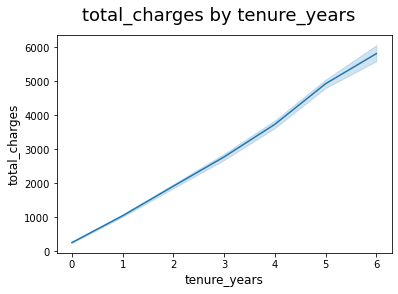

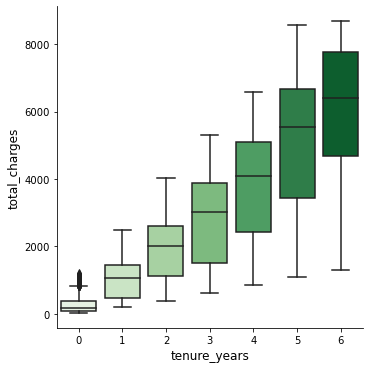

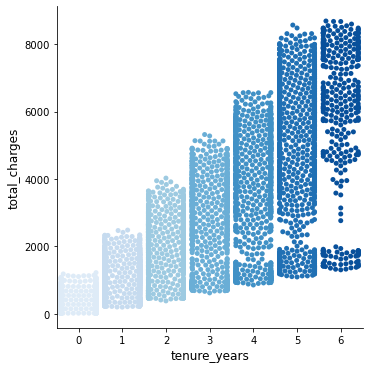

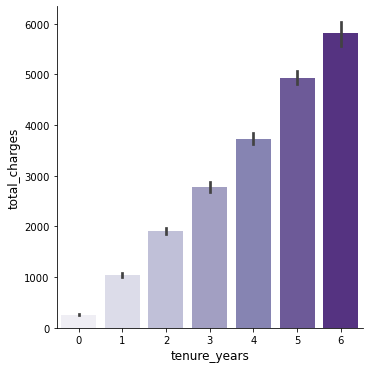

In [60]:
plot_categorical_and_continuous_vars('tenure_years', 'total_charges', df)

**Object Oriented Approach, subplots method**
- figure is the container holding our plots

- axes are the actual plots

- so our plot can contain more than one axis

In [62]:
def plot_categorical_and_continuous_vars_telco(df):  
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,10), nrows=3,ncols=1, sharex=True)
    plt.style.use('seaborn-bright')

    plt.suptitle('Total Charges by Tenure Years', fontsize=18)

    ax1.plot(df.tenure_years, df.total_charges, color='mediumblue')
    ax1.set_ylabel('US Dollars', fontsize=14)

    ax2.bar(df.tenure_years, df.total_charges, color='thistle')
    ax2.set_ylabel('US Dollars', fontsize=14)

    ax3.scatter(df.tenure_years, df.total_charges, color='skyblue')
    ax3.set_xlabel('Tenure in Years', fontsize=14)
    ax3.set_ylabel('US Dollars', fontsize=14)

    plt.tight_layout()
    plt.show()

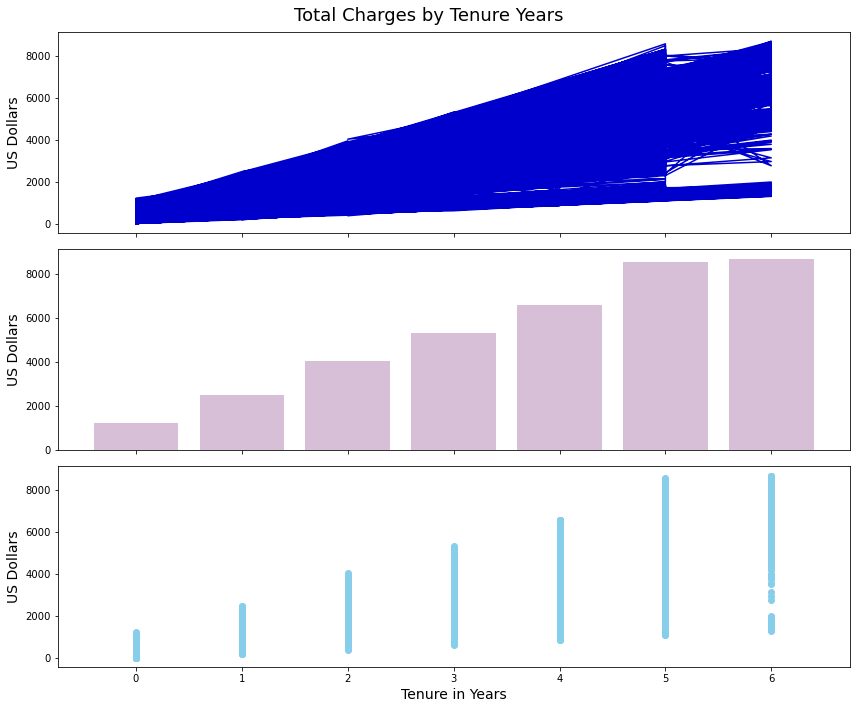

In [63]:

plot_categorical_and_continuous_vars_telco(df)